Model: model_1, RMSE: 0.2056
Model: model_10, RMSE: 0.2688
Model: model_100, RMSE: 0.2327
Model: model_101, RMSE: 0.2346
Model: model_102, RMSE: 0.2329
Model: model_103, RMSE: 0.2357
Model: model_104, RMSE: 0.2341
Model: model_105, RMSE: 0.2333
Model: model_106, RMSE: 0.2354
Model: model_107, RMSE: 0.2310
Model: model_108, RMSE: 0.2333
Model: model_109, RMSE: 0.2352
Model: model_11, RMSE: 0.2022
Model: model_110, RMSE: 0.2335
Model: model_111, RMSE: 0.2352
Model: model_112, RMSE: 0.2338
Model: model_113, RMSE: 0.2337
Model: model_114, RMSE: 0.2322
Model: model_115, RMSE: 0.2323
Model: model_116, RMSE: 0.2346
Model: model_117, RMSE: 0.2365
Model: model_118, RMSE: 0.2323
Model: model_119, RMSE: 0.2314
Model: model_12, RMSE: 0.2471
Model: model_120, RMSE: 0.2329
Model: model_121, RMSE: 0.2371
Model: model_122, RMSE: 0.2332
Model: model_123, RMSE: 0.2332
Model: model_124, RMSE: 0.2357
Model: model_125, RMSE: 0.2342
Model: model_126, RMSE: 0.2297
Model: model_127, RMSE: 0.2353
Model: model_

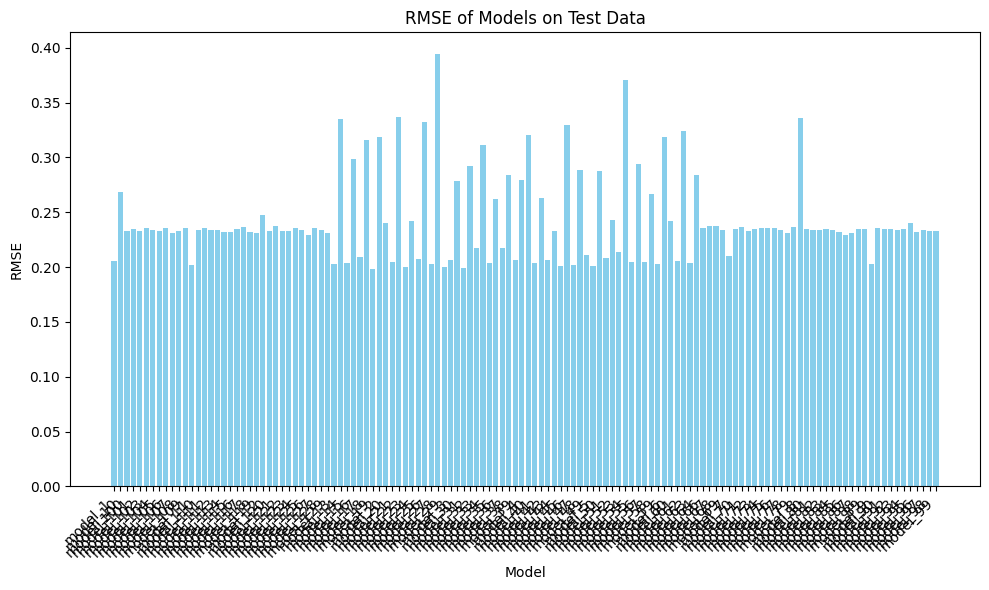

In [8]:
import os
import json
import torch
import numpy as np
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
from scripts.model import run_models, load_models
from scripts.data_setup import load_data
from scripts.from_circ_to_numpy import load_from_json

# Load data
n_qubits = 5
train_circuits, train_observables, train_ideal_exp_vals, train_noisy_exp_vals, test_circuits, test_observables, test_ideal_exp_vals, test_noisy_exp_vals = load_data('data/circuits/data_small_1')
X_train, y_train, X_test, y_test = load_from_json('data/features/data_small_1')

models_directory = 'experiments/test_1/models'
results_directory = 'experiments/test_1/results'

def evaluate_model(sequence_model, ann, X_test, test_noisy_exp_vals, y_test, noisy_first):
    y_pred = []
    with torch.inference_mode():
        for i in range(len(X_test)):
            y_pred.append(run_models(sequence_model, ann, X_test[i], test_noisy_exp_vals[i], noisy_first).detach().cpu().numpy())
    return root_mean_squared_error(y_test, y_pred)

rmse_results = {}

for result_file in os.listdir(results_directory):
    if result_file.endswith('.json'):
        result_path = os.path.join(results_directory, result_file)
        
        with open(result_path, 'r') as f:
            results = json.load(f)
        
        model_name = result_file.replace('results_', '').replace('.json', '')
        model_path = os.path.join(models_directory, model_name)
        
        sequence_model, ann = load_models(model_path)
        
        with open(os.path.join(model_path, 'sequence_config.json'), 'r') as f:
            sequence_config = json.load(f)
        
        with open(os.path.join(model_path, 'ann_config.json'), 'r') as f:
            ann_config = json.load(f)
        
        noisy_first = ann_config['noisy_first']
        rmse = evaluate_model(sequence_model, ann, X_test, test_noisy_exp_vals, y_test, noisy_first)
        
        rmse_results[model_name] = float(rmse)
        print(f"Model: {model_name}, RMSE: {rmse:.4f}")

rmse_results_path = os.path.join(results_directory, 'rmse_results.json')
with open(rmse_results_path, 'w') as f:
    json.dump(rmse_results, f)

model_names = list(rmse_results.keys())
rmse_values = list(rmse_results.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of Models on Test Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#plot_path = os.path.join(results_directory, 'rmse_plot.png')
#plt.savefig(plot_path)
plt.show()


Model: model_19, RMSE: 0.1987
Model: model_31, RMSE: 0.1987


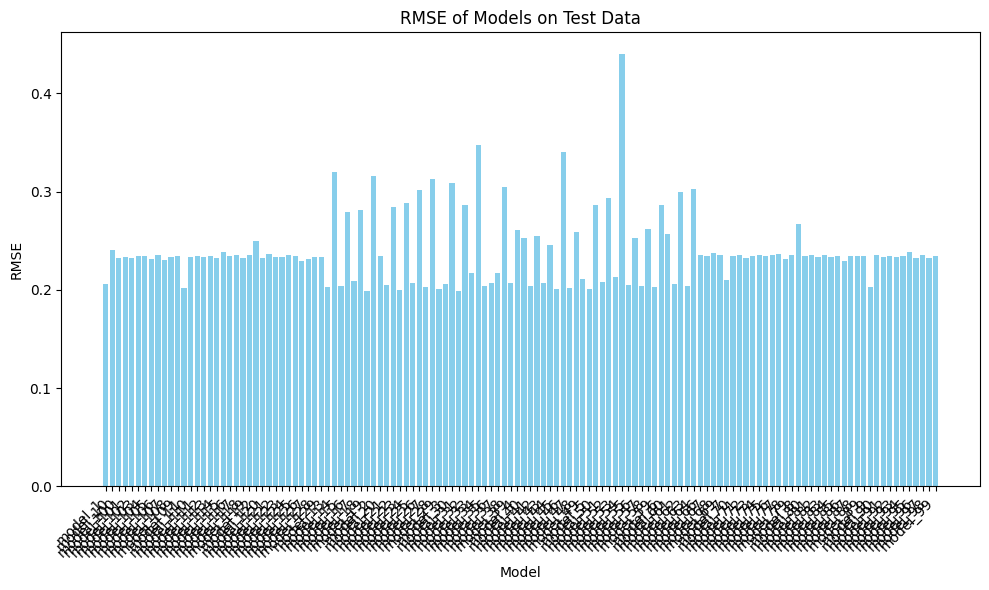

In [14]:
import os
import json
import torch
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scripts.model import run_models, load_models
from scripts.data_setup import load_data
from scripts.from_circ_to_numpy import load_from_json

n_qubits = 5
train_circuits, train_observables, train_ideal_exp_vals, train_noisy_exp_vals, test_circuits, test_observables, test_ideal_exp_vals, test_noisy_exp_vals = load_data('data/circuits/data_small_1')
X_train, y_train, X_test, y_test = load_from_json('data/features/data_small_1')

models_directory = 'experiments/test_1/models'
results_directory = 'experiments/test_1/results'

def evaluate_model(sequence_model, ann, X_test, test_noisy_exp_vals, y_test, noisy_first):
    y_pred = []
    with torch.inference_mode():
        for i in range(len(X_test)):
            y_pred.append(run_models(sequence_model, ann, X_test[i], test_noisy_exp_vals[i], noisy_first).detach().cpu().numpy())
    return root_mean_squared_error(y_test, y_pred)

rmse_results = {}

for result_file in os.listdir(results_directory):
    if result_file.endswith('.json') and result_file != 'rmse_results.json':
        result_path = os.path.join(results_directory, result_file)
        
        try:
            with open(result_path, 'r') as f:
                results = json.load(f)
        except json.JSONDecodeError as e:
            print(f"Error reading JSON file {result_path}: {e}")
            continue
        
        model_name = result_file.replace('results_', '').replace('.json', '')
        model_path = os.path.join(models_directory, model_name)
        
        try:
            sequence_model, ann = load_models(model_path)
        except FileNotFoundError as e:
            print(f"Model files not found for {model_name}: {e}")
            continue
        
        try:
            with open(os.path.join(model_path, 'sequence_config.json'), 'r') as f:
                sequence_config = json.load(f)
            
            with open(os.path.join(model_path, 'ann_config.json'), 'r') as f:
                ann_config = json.load(f)
        except json.JSONDecodeError as e:
            print(f"Error reading model config JSON for {model_name}: {e}")
            continue
        
        noisy_first = ann_config['noisy_first']
        rmse = evaluate_model(sequence_model, ann, X_test, test_noisy_exp_vals, y_test, noisy_first)
        
        rmse_results[model_name] = float(rmse)

        if rmse < 0.2:
            print(f"Model: {model_name}, RMSE: {rmse:.4f}")

rmse_results_path = os.path.join(results_directory, 'rmse_results.json')
with open(rmse_results_path, 'w') as f:
    json.dump(rmse_results, f)

model_names = list(rmse_results.keys())
rmse_values = list(rmse_results.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of Models on Test Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plot_path = os.path.join(results_directory, 'rmse_plot.png')
plt.savefig(plot_path)
plt.show()


In [16]:
sequence_model, ann = load_models('experiments/test_1/models/model_19')

In [18]:
sequence_model

SequenceModel(
  (qubit_models): ModuleDict(
    (sequence_0): RNN(7, 1, num_layers=2, batch_first=True)
    (sequence_1): RNN(7, 1, num_layers=2, batch_first=True)
    (sequence_2): RNN(7, 1, num_layers=2, batch_first=True)
    (sequence_3): RNN(7, 1, num_layers=2, batch_first=True)
    (sequence_4): RNN(7, 1, num_layers=2, batch_first=True)
  )
)

In [19]:
ann

ANN(
  (layers): ModuleDict(
    (input): Linear(in_features=6, out_features=32, bias=True)
    (hidden0): Linear(in_features=32, out_features=32, bias=True)
    (output): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [20]:
sequence_model, ann = load_models('experiments/test_1/models/model_31')

In [21]:
sequence_model

SequenceModel(
  (qubit_models): ModuleDict(
    (sequence_0): LSTM(7, 1, num_layers=2, batch_first=True)
    (sequence_1): LSTM(7, 1, num_layers=2, batch_first=True)
    (sequence_2): LSTM(7, 1, num_layers=2, batch_first=True)
    (sequence_3): LSTM(7, 1, num_layers=2, batch_first=True)
    (sequence_4): LSTM(7, 1, num_layers=2, batch_first=True)
  )
)

In [22]:
ann

ANN(
  (layers): ModuleDict(
    (input): Linear(in_features=6, out_features=32, bias=True)
    (hidden0): Linear(in_features=32, out_features=32, bias=True)
    (hidden1): Linear(in_features=32, out_features=32, bias=True)
    (output): Linear(in_features=32, out_features=1, bias=True)
  )
)